In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [2]:
# Load the pipeline model from the file
with open('modelo_cdhit.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [3]:
df = pd.read_csv('PhageAcr_ML_dataset_cdhit.csv')             # Read dataset
df.set_index('ID', inplace=True)                              # Set the "ID" column as the index
df = df.rename(columns={'Protein Acr': 'Protein_Acr'})  # Renaming columns to avoid issues later

# Extracting features (X) and target variable (y)
X = df.drop('Protein_Acr', axis=1)    # Keep only the features in variable x
y = df['Protein_Acr']                 # Assign our Target variable as y

# Split the dataset into training+validation (80%) and test sets (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # random_state will allow for the reproductibility of the split

# Split the training+validation set into training (70%) and validation sets (10% of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Checking the shape of the resulting sets
print(f'Training Set \t Shape of X_train: {X_train.shape} \n\t\t Shape of y_train: {y_train.shape} \n')
print(f'Validation Set \t Shape of X_val: {X_val.shape} \n\t\t Shape of y_val: {y_val.shape} \n')
print(f'Test Set \t Shape of X_test: {X_test.shape} \n\t\t Shape of y_test: {y_test.shape}')

Training Set 	 Shape of X_train: (1570, 25) 
		 Shape of y_train: (1570,) 

Validation Set 	 Shape of X_val: (225, 25) 
		 Shape of y_val: (225,) 

Test Set 	 Shape of X_test: (449, 25) 
		 Shape of y_test: (449,)


In [4]:
# Now you can use the loaded model
# For example, make predictions
y_pred = loaded_model.predict(X_test)

# Perform further machine learning tasks
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9198218262806236


In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.0801781737193764
R^2 Score: 0.6792857142857143


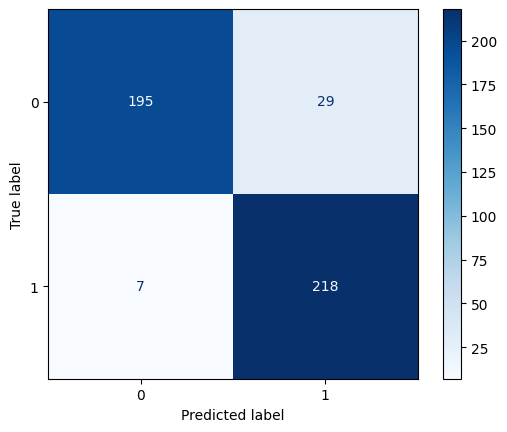

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 4: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [7]:
loaded_model.steps

[('imputer', SimpleImputer()),
 ('selector', SelectKBest(k=25)),
 ('scaler', StandardScaler()),
 ('pca', PCA()),
 ('logr', LogisticRegression(max_iter=10000))]

In [8]:
from sklearn.metrics import confusion_matrix

# Fit the pipeline (excluding PCA step as it is already applied)
loaded_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = loaded_model.predict(X_test_pca)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Optional: plot confusion matrix
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


NameError: name 'X_train_pca' is not defined

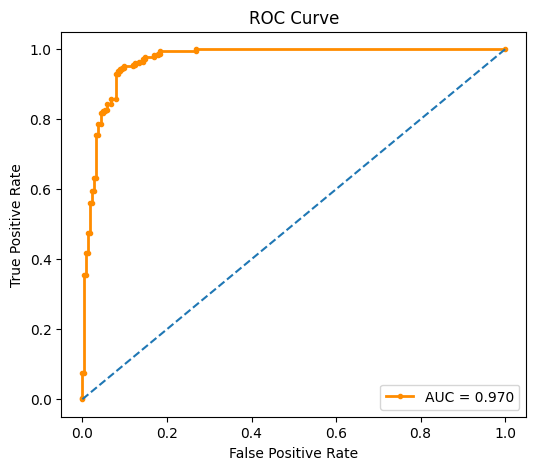

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# If binary classification, ensure y_test and y_pred_proba are appropriate
y_pred_proba = loaded_model.predict_proba(X_test_pca)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, marker='.', color='darkorange', lw=2, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()